In [17]:
import numpy as np

M = 12
mu = np.linspace(0, 1, M)
mu[0] = 1

def h(X):    
    return np.sin(2 * np.pi * X)

def phi(x, mu):
    return np.exp(-1000/2 * (x-mu)**2)

def generate_dataset(size):
    X = np.random.uniform(size=size)
    T = np.sin(2 * np.pi * X) + 0.5 * np.random.normal(size = size)
    return (X,T)

def generate_datasets(count, size):
    return [generate_dataset(size) for i in range(count)]

def Phi(X):
    Phi = np.zeros((len(X),M))
    for i in range(len(X)):
        for j in range(M):
            Phi[i,j] = phi(X[i], mu[j])
    return Phi

def fit_model(X, T, lam):
    inv = np.linalg.inv(lam * np.identity(M) + X.T.dot(X))
    W_opt = inv.dot(X.T).dot(T)
    return W_opt

def predict(X, W):
    return X.dot(W)

lam=0.1
N = 25
Z = np.linspace(-2, 3, 100)
X,T = generate_dataset(N)
W = fit_model(Phi(X),T,lam) 

In [29]:
from sklearn.linear_model import Ridge

model = Ridge(alpha = lam/2, fit_intercept = False)
model.fit(Phi(X),T)

Ridge(alpha=0.05, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

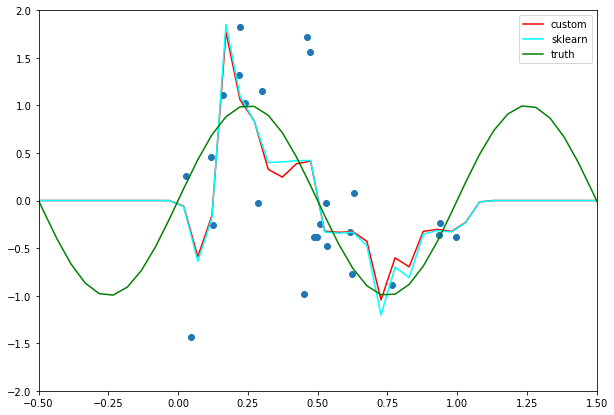

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.xlim([-0.5,1.5])
plt.ylim([-2,2])
plt.scatter(X,T)
plt.plot(Z, predict(Phi(Z), W), color = 'red', label = 'custom')
plt.plot(Z, model.predict(Phi(Z)), color = 'cyan', label = 'sklearn')
plt.plot(Z, h(Z), color = 'green', label = 'truth')
plt.legend()
plt.show()